# The Cancer Gene Atlas Cancer (TCGA) - Cervical squamous cell carcinoma and endocervical adenocarcinoma (CESC)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Tue Apr 24 16:28:41 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
        if '01' in str(col.split('-')[3]):
            sampleType = 'Primary Solid Tumor'
        elif '11' in str(col.split('-')[3]):
            sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+sampleType,
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

# Path to Output Files

In [9]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [10]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [11]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [12]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [13]:
sample_meta = pd.read_csv('Input/metadata_Cervical squamous cell carcinoma and endocervical adenocarcinoma [CESC]', sep='\t', index_col=1)

In [14]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-C5-A7CO,6458,CESC,TCGA,FF3808E4-EECE-4046-819B-FE1019317F8E,C5,68.0,NaN,361,Nationwide Children's Hospital,NaN,...,39.3,20.0,NaN,No,NaN,NaN,NaN,1972.0,NaN,NaN
TCGA-FU-A57G,6459,CESC,TCGA,968BD652-786C-4DDB-A937-DC480CB821FC,FU,49.0,NaN,280,Nationwide Children's Hospital,NaN,...,22.3,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-Q1-A6DV,6460,CESC,TCGA,C80F777E-D150-40F3-9FA9-02EF9A6D7692,Q1,36.0,NaN,335,Nationwide Children's Hospital,NaN,...,26.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-UC-A7PI,6461,CESC,TCGA,C659F1C9-F3B4-4CFE-8627-2BB716C62B96,UC,44.0,NaN,420,Nationwide Children's Hospital,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-EA-A5O9,6462,CESC,TCGA,1636242C-12DA-412E-A362-914A20ADD708,EA,39.0,NaN,297,Nationwide Children's Hospital,NaN,...,38.7,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sample_meta.shape

(307, 70)

# Load Data

In [16]:
matrix = pd.read_csv('Input/TCGA_CESC_tpm.tsv', sep='\t', index_col=0)

In [17]:
matrix.head()

,218f3dff-33b2-4197-9ba5-2c3b28810682,e4dad31f-3b56-4377-b92b-3e8b184415b0,af576cb3-bdf5-4e74-8121-7b8d35eddf6b,a9d80e09-37c1-4778-9118-196a2667465e,0e559835-8a90-4345-890b-1aa57dd122a8,62ce93a6-b617-4c05-b279-2ef3b22c8cdd,3bc0d63b-619d-4672-a0b4-3fcb11118179,44843334-81c0-40f2-a5d1-5d522669b08d,59ae5f8e-d108-4126-a965-e4ae4b401ad8,8761f4e7-8b3b-42b5-b3d7-dbb90c01671e,...,04de2728-df54-4601-8656-4a7b4d55eca1,1c0727df-7dd3-4b09-9b85-01167af2b75a,d107eb1b-0a61-44ba-9ec1-0ea0f38d257c,fe0040ec-568e-4713-afbd-d24fb9d2b273,a41e6939-ae45-4c25-93ad-aa0070645f6e,d0bbb62d-2314-454a-a2f4-0f8bb0853b06,833b6e11-17fe-4a49-aa67-00bad2ed7048,a5c95229-b9c5-4969-9fb8-9c0bcb313440,b77222ff-49b1-402c-8872-e185589f0f78,5de8be54-36f8-430c-9989-e347d2857c30
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,188.908000,80.395200,161.16500,159.406000,148.403000,182.524000,179.1690,115.227000,137.349000,85.834500,...,208.76100,145.767000,155.98100,165.20100,132.136000,138.49900,255.829000,176.534000,136.82200,171.5300
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,54.343900,17.636200,1.34824,37.397900,7.286950,35.380800,25.1715,0.976927,57.823200,39.762500,...,29.00620,32.194100,39.54800,32.78160,35.857800,27.41830,37.724800,4.870240,1.80703,54.0014
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,27.749300,19.057200,15.82000,6.807110,26.669200,20.254700,28.5945,12.119200,25.021000,10.859600,...,17.03630,7.894920,21.04590,14.05170,17.902300,22.41990,20.860300,8.029300,43.98820,43.5903
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,50.185500,32.716400,31.36660,75.943000,39.796300,109.253000,57.4280,79.395000,56.459200,31.063500,...,70.01920,42.531400,87.41200,46.67380,186.541000,39.17050,70.405300,30.817900,9.04757,198.5680
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.860938,0.336042,0.00000,0.584109,0.011916,0.530092,0.0000,0.000000,0.495132,0.491442,...,1.32608,0.143871,1.11029,7.05335,0.268404,1.59977,0.297392,0.123538,0.00000,1.0122


In [18]:
matrix.shape

(199169, 309)

# Get Only Protein Coding Genes

In [19]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [20]:
matrix.head()

,218f3dff-33b2-4197-9ba5-2c3b28810682,e4dad31f-3b56-4377-b92b-3e8b184415b0,af576cb3-bdf5-4e74-8121-7b8d35eddf6b,a9d80e09-37c1-4778-9118-196a2667465e,0e559835-8a90-4345-890b-1aa57dd122a8,62ce93a6-b617-4c05-b279-2ef3b22c8cdd,3bc0d63b-619d-4672-a0b4-3fcb11118179,44843334-81c0-40f2-a5d1-5d522669b08d,59ae5f8e-d108-4126-a965-e4ae4b401ad8,8761f4e7-8b3b-42b5-b3d7-dbb90c01671e,...,04de2728-df54-4601-8656-4a7b4d55eca1,1c0727df-7dd3-4b09-9b85-01167af2b75a,d107eb1b-0a61-44ba-9ec1-0ea0f38d257c,fe0040ec-568e-4713-afbd-d24fb9d2b273,a41e6939-ae45-4c25-93ad-aa0070645f6e,d0bbb62d-2314-454a-a2f4-0f8bb0853b06,833b6e11-17fe-4a49-aa67-00bad2ed7048,a5c95229-b9c5-4969-9fb8-9c0bcb313440,b77222ff-49b1-402c-8872-e185589f0f78,5de8be54-36f8-430c-9989-e347d2857c30
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,188.908000,80.395200,161.16500,159.406000,148.403000,182.524000,179.1690,115.227000,137.349000,85.834500,...,208.76100,145.767000,155.98100,165.20100,132.136000,138.49900,255.829000,176.534000,136.82200,171.5300
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,54.343900,17.636200,1.34824,37.397900,7.286950,35.380800,25.1715,0.976927,57.823200,39.762500,...,29.00620,32.194100,39.54800,32.78160,35.857800,27.41830,37.724800,4.870240,1.80703,54.0014
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,27.749300,19.057200,15.82000,6.807110,26.669200,20.254700,28.5945,12.119200,25.021000,10.859600,...,17.03630,7.894920,21.04590,14.05170,17.902300,22.41990,20.860300,8.029300,43.98820,43.5903
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,50.185500,32.716400,31.36660,75.943000,39.796300,109.253000,57.4280,79.395000,56.459200,31.063500,...,70.01920,42.531400,87.41200,46.67380,186.541000,39.17050,70.405300,30.817900,9.04757,198.5680
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.860938,0.336042,0.00000,0.584109,0.011916,0.530092,0.0000,0.000000,0.495132,0.491442,...,1.32608,0.143871,1.11029,7.05335,0.268404,1.59977,0.297392,0.123538,0.00000,1.0122


In [21]:
matrix.shape

(79930, 309)

# Map Sample Meta Data to Sample ID

In [22]:
getSampleID(matrix, meta)

In [23]:
matrix.head()

,TCGA-HM-A4S6-01,TCGA-FU-A40J-01,TCGA-EA-A3Y4-01,TCGA-EA-A439-01,TCGA-IR-A3LB-01,TCGA-FU-A3TQ-01,TCGA-IR-A3LA-01,TCGA-FU-A23K-01,TCGA-DG-A2KL-01,TCGA-DG-A2KM-01,...,TCGA-VS-A950-01,TCGA-VS-A9UB-01,TCGA-ZJ-AAXT-01,TCGA-VS-A9UC-01,TCGA-ZJ-AAXU-01,TCGA-ZX-AA5X-01,TCGA-ZJ-AAX4-01,TCGA-C5-A1MQ-01,TCGA-ZJ-AAXI-01,TCGA-VS-A9U6-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,188.908000,80.395200,161.16500,159.406000,148.403000,182.524000,179.1690,115.227000,137.349000,85.834500,...,208.76100,145.767000,155.98100,165.20100,132.136000,138.49900,255.829000,176.534000,136.82200,171.5300
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,54.343900,17.636200,1.34824,37.397900,7.286950,35.380800,25.1715,0.976927,57.823200,39.762500,...,29.00620,32.194100,39.54800,32.78160,35.857800,27.41830,37.724800,4.870240,1.80703,54.0014
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,27.749300,19.057200,15.82000,6.807110,26.669200,20.254700,28.5945,12.119200,25.021000,10.859600,...,17.03630,7.894920,21.04590,14.05170,17.902300,22.41990,20.860300,8.029300,43.98820,43.5903
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,50.185500,32.716400,31.36660,75.943000,39.796300,109.253000,57.4280,79.395000,56.459200,31.063500,...,70.01920,42.531400,87.41200,46.67380,186.541000,39.17050,70.405300,30.817900,9.04757,198.5680
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.860938,0.336042,0.00000,0.584109,0.011916,0.530092,0.0000,0.000000,0.495132,0.491442,...,1.32608,0.143871,1.11029,7.05335,0.268404,1.59977,0.297392,0.123538,0.00000,1.0122


# Map Gene Symbol to Gene ID

In [26]:
getGenes(matrix)

In [27]:
matrix.head()

,TCGA-HM-A4S6-01,TCGA-FU-A40J-01,TCGA-EA-A3Y4-01,TCGA-EA-A439-01,TCGA-IR-A3LB-01,TCGA-FU-A3TQ-01,TCGA-IR-A3LA-01,TCGA-FU-A23K-01,TCGA-DG-A2KL-01,TCGA-DG-A2KM-01,...,TCGA-VS-A950-01,TCGA-VS-A9UB-01,TCGA-ZJ-AAXT-01,TCGA-VS-A9UC-01,TCGA-ZJ-AAXU-01,TCGA-ZX-AA5X-01,TCGA-ZJ-AAX4-01,TCGA-C5-A1MQ-01,TCGA-ZJ-AAXI-01,TCGA-VS-A9U6-01
ARF5,188.908000,80.395200,161.16500,159.406000,148.403000,182.524000,179.1690,115.227000,137.349000,85.834500,...,208.76100,145.767000,155.98100,165.20100,132.136000,138.49900,255.829000,176.534000,136.82200,171.5300
M6PR,54.343900,17.636200,1.34824,37.397900,7.286950,35.380800,25.1715,0.976927,57.823200,39.762500,...,29.00620,32.194100,39.54800,32.78160,35.857800,27.41830,37.724800,4.870240,1.80703,54.0014
ESRRA,27.749300,19.057200,15.82000,6.807110,26.669200,20.254700,28.5945,12.119200,25.021000,10.859600,...,17.03630,7.894920,21.04590,14.05170,17.902300,22.41990,20.860300,8.029300,43.98820,43.5903
FKBP4,50.185500,32.716400,31.36660,75.943000,39.796300,109.253000,57.4280,79.395000,56.459200,31.063500,...,70.01920,42.531400,87.41200,46.67380,186.541000,39.17050,70.405300,30.817900,9.04757,198.5680
CYP26B1,0.860938,0.336042,0.00000,0.584109,0.011916,0.530092,0.0000,0.000000,0.495132,0.491442,...,1.32608,0.143871,1.11029,7.05335,0.268404,1.59977,0.297392,0.123538,0.00000,1.0122


# Histogram of First Sample

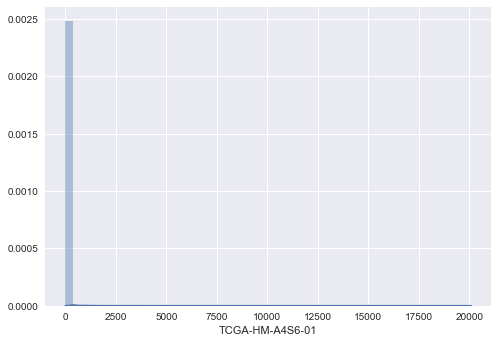

In [28]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

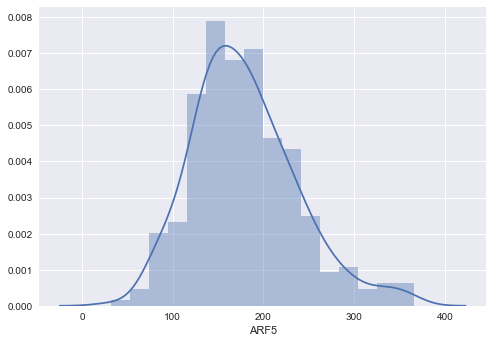

In [29]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [30]:
filename = path+'tcga_cesc_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [31]:
normalized_matrix = matrix.copy()

In [32]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [33]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [34]:
normalized_matrix.head()

,TCGA-HM-A4S6-01,TCGA-FU-A40J-01,TCGA-EA-A3Y4-01,TCGA-EA-A439-01,TCGA-IR-A3LB-01,TCGA-FU-A3TQ-01,TCGA-IR-A3LA-01,TCGA-FU-A23K-01,TCGA-DG-A2KL-01,TCGA-DG-A2KM-01,...,TCGA-VS-A950-01,TCGA-VS-A9UB-01,TCGA-ZJ-AAXT-01,TCGA-VS-A9UC-01,TCGA-ZJ-AAXU-01,TCGA-ZX-AA5X-01,TCGA-ZJ-AAX4-01,TCGA-C5-A1MQ-01,TCGA-ZJ-AAXI-01,TCGA-VS-A9U6-01
A1BG,0.165152,0.014389,0.165152,0.165152,0.043246,0.165152,0.165152,0.165152,0.165152,0.165152,...,0.165152,0.031864,0.165152,0.165152,0.165152,0.048422,0.165152,0.021551,0.165152,0.088483
A1CF,0.022767,0.025496,0.002392,0.018276,0.164538,0.010861,0.009066,0.003331,0.013165,0.002707,...,0.003086,0.022883,0.024715,0.002783,0.001403,0.009403,0.025821,0.053738,0.005058,0.029337
A2M,62.517000,52.991000,9.165410,117.239000,36.186800,30.854800,44.010900,33.221500,56.954500,107.266000,...,26.582500,17.289100,22.738900,63.151300,11.416500,109.007000,86.177200,35.294600,4.181760,31.840300
A2ML1,38.484000,0.321668,2.356310,0.218906,0.135872,275.730000,0.271362,0.088166,243.803000,18.564200,...,6.557190,0.067921,16.967100,221.545000,9.891590,29.168600,94.039800,0.323416,2.983860,3.497460
A3GALT2,0.340682,0.092504,0.024028,0.139981,0.027414,0.163018,0.124107,0.124107,0.120830,0.023774,...,0.162808,0.038051,0.189571,0.119029,0.035407,0.039002,0.132875,0.015775,0.064177,0.047938


In [35]:
normalized_matrix.shape

(18987, 309)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [36]:
samples = normalized_matrix.columns.tolist()

In [37]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [38]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [39]:
normalized_matrix.columns = samples

In [40]:
normalized_matrix.head()

,TCGA-HM-A4S6-01,TCGA-FU-A40J-01,TCGA-EA-A3Y4-01,TCGA-EA-A439-01,TCGA-IR-A3LB-01,TCGA-FU-A3TQ-01,TCGA-IR-A3LA-01,TCGA-FU-A23K-01,TCGA-DG-A2KL-01,TCGA-DG-A2KM-01,...,TCGA-VS-A950-01,TCGA-VS-A9UB-01,TCGA-ZJ-AAXT-01,TCGA-VS-A9UC-01,TCGA-ZJ-AAXU-01,TCGA-ZX-AA5X-01,TCGA-ZJ-AAX4-01,TCGA-C5-A1MQ-01,TCGA-ZJ-AAXI-01,TCGA-VS-A9U6-01
A1BG,-0.594847,-1.660167,-0.570950,-0.578010,-1.178146,-0.611322,-0.632279,-0.521109,-0.609271,-0.458270,...,-0.568221,-1.302215,-0.582481,-0.619805,-0.541131,-1.145866,-0.601565,-1.385563,-0.610832,-0.852606
A1CF,-1.455416,-1.411723,-2.410137,-1.534002,-0.597829,-1.793345,-1.892734,-2.216441,-1.707748,-2.243736,...,-2.296710,-1.445995,-1.407412,-2.393176,-2.611895,-1.857660,-1.407483,-0.988743,-2.124723,-1.332055
A2M,1.983266,1.906004,1.173318,2.273177,1.744455,1.660116,1.793397,1.782426,1.928373,2.354308,...,1.638490,1.432262,1.556404,1.962693,1.298518,2.206545,2.115943,1.828687,0.792643,1.703513
A2ML1,1.772548,-0.310790,0.583398,-0.455637,-0.680965,2.611277,-0.416614,-0.793693,2.559884,1.592522,...,1.030612,-0.973506,1.429242,2.507773,1.236251,1.634006,2.153862,-0.209259,0.646063,0.744288
A3GALT2,-0.280383,-0.852040,-1.408120,-0.649826,-1.376121,-0.616971,-0.756367,-0.645197,-0.744980,-1.300048,...,-0.574430,-1.225150,-0.522593,-0.762036,-1.209930,-1.239825,-0.696006,-1.521038,-1.021338,-1.118785


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [41]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [42]:
normalized_matrix.head()

,TCGA-HM-A4S6-01,TCGA-FU-A40J-01,TCGA-EA-A3Y4-01,TCGA-EA-A439-01,TCGA-IR-A3LB-01,TCGA-FU-A3TQ-01,TCGA-IR-A3LA-01,TCGA-FU-A23K-01,TCGA-DG-A2KL-01,TCGA-DG-A2KM-01,...,TCGA-VS-A950-01,TCGA-VS-A9UB-01,TCGA-ZJ-AAXT-01,TCGA-VS-A9UC-01,TCGA-ZJ-AAXU-01,TCGA-ZX-AA5X-01,TCGA-ZJ-AAX4-01,TCGA-C5-A1MQ-01,TCGA-ZJ-AAXI-01,TCGA-VS-A9U6-01
A1BG,-0.641457,-1.630484,-0.333767,-0.678707,-1.159601,-0.584005,-0.567795,-0.297791,-0.656586,-0.535581,...,-0.566168,-1.399730,-0.595969,-0.633193,-0.399100,-1.294303,-0.681393,-1.325634,-0.425681,-1.054754
A1CF,-1.537613,-1.413632,-2.087018,-1.541742,-0.645446,-1.689142,-1.791161,-1.953598,-1.711260,-2.237292,...,-2.328838,-1.568967,-1.457183,-2.423378,-2.437461,-2.070449,-1.512453,-0.905759,-2.000306,-1.483000
A2M,1.942323,1.974914,1.396208,2.185552,1.791096,1.644429,1.889955,1.866681,1.879285,2.352681,...,1.619393,1.365968,1.498707,2.021238,1.374513,2.300804,2.123453,1.899128,1.047552,1.600351
A2ML1,1.712534,-0.437464,0.869065,-0.579454,-0.721438,2.599077,-0.355351,-0.617165,2.520700,1.589710,...,0.990693,-1.078405,1.375363,2.576759,1.318132,1.686609,2.165858,-0.066509,0.900132,0.526181
A3GALT2,-0.326978,-0.917377,-1.190788,-0.740744,-1.332318,-0.589585,-0.687122,-0.442224,-0.785277,-1.346728,...,-0.570627,-1.328924,-0.531270,-0.769849,-1.113527,-1.391310,-0.786316,-1.460404,-0.884641,-1.274693


# Normalize Matrix (z-score the rows)

In [43]:
mf.zscore(normalized_matrix, 'row')

In [44]:
normalized_matrix.head()

,TCGA-HM-A4S6-01,TCGA-FU-A40J-01,TCGA-EA-A3Y4-01,TCGA-EA-A439-01,TCGA-IR-A3LB-01,TCGA-FU-A3TQ-01,TCGA-IR-A3LA-01,TCGA-FU-A23K-01,TCGA-DG-A2KL-01,TCGA-DG-A2KM-01,...,TCGA-VS-A950-01,TCGA-VS-A9UB-01,TCGA-ZJ-AAXT-01,TCGA-VS-A9UC-01,TCGA-ZJ-AAXU-01,TCGA-ZX-AA5X-01,TCGA-ZJ-AAX4-01,TCGA-C5-A1MQ-01,TCGA-ZJ-AAXI-01,TCGA-VS-A9U6-01
A1BG,-0.229431,-6.677770,1.776664,-0.472301,-3.607671,0.145149,0.250835,2.011225,-0.328074,0.460864,...,0.261439,-5.173277,0.067144,-0.175553,1.350703,-4.485911,-0.489811,-4.690184,1.177401,-2.924079
A1CF,0.372866,0.712152,-1.130634,0.361567,2.814371,-0.041807,-0.320993,-0.765517,-0.102336,-1.541874,...,-1.792401,0.287063,0.592973,-2.051117,-2.089658,-1.085291,0.441721,2.101999,-0.893339,0.522320
A2M,0.798550,0.892145,-0.769797,1.497061,0.364251,-0.056950,0.648157,0.581319,0.617515,1.977025,...,-0.128848,-0.856641,-0.475439,1.025181,-0.832102,1.828044,1.318724,0.674500,-1.771076,-0.183535
A2ML1,0.633860,-1.315927,-0.131064,-1.444695,-1.573458,1.437847,-1.241461,-1.478895,1.366769,0.522474,...,-0.020762,-1.897184,0.328087,1.417608,0.276185,0.610349,1.044970,-0.979517,-0.102890,-0.442019
A3GALT2,1.389509,-0.421405,-1.260032,0.120378,-1.694142,0.584024,0.284849,1.036020,-0.016219,-1.738342,...,0.642173,-1.683732,0.762891,0.031105,-1.023049,-1.875088,-0.019406,-2.087016,-0.320995,-1.517391


# Merge Like Column (by taking the mean)

In [45]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [46]:
normalized_matrix.shape

(18987, 309)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [47]:
mf.mapgenesymbols(normalized_matrix)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.


In [48]:
normalized_matrix.shape

(18568, 309)

# Merge Duplicate Genes By Rows

In [49]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [50]:
normalized_matrix.shape

(18478, 309)

# Histogram of First Sample

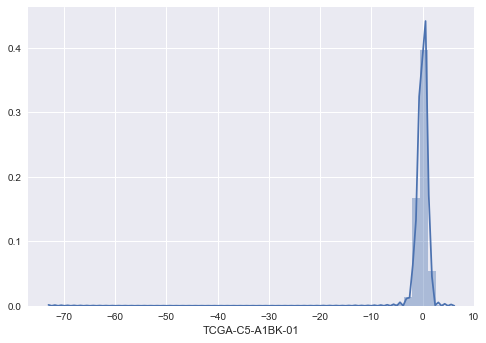

In [51]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

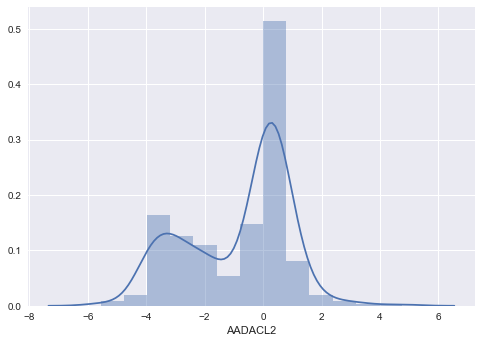

In [52]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [53]:
filename = path+'tcga_cesc_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [54]:
gene_list = mf.createGeneList(normalized_matrix)

In [55]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [56]:
gene_list.shape

(18478, 2)

# Save Gene List

In [57]:
filename = path+'tcga_cesc_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [58]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        if  '01' in str(index.split('-')[3]):
            sampleType = 'Primary Solid Tumor'
        elif '11' in str(index.split('-')[3]):
            sampleType= 'Solid Tissue Normal'
        metaData.loc[index, 'Sample Type'] = sampleType
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        if  '01' in str(index.split('-')[3]):
            sampleType = 'Primary Solid Tumor'
        elif '11' in str(index.split('-')[3]):
            sampleType= 'Solid Tissue Normal'
        metaData.loc[index, 'Sample Type'] = sampleType
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [59]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [60]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-2W-A8YY-01,51,FEMALE,M0,N0,T2a2,NaN,Adenosquamous,Primary Solid Tumor,Cervical,G3
TCGA-4J-AA1J-01,31,FEMALE,M0,N0,T1b2,NaN,Cervical Squamous Cell Carcinoma,Primary Solid Tumor,Cervical,G3
TCGA-BI-A0VR-01,53,FEMALE,M0,N1,T2b,NaN,Cervical Squamous Cell Carcinoma,Primary Solid Tumor,Cervical,G3
TCGA-BI-A0VS-01,48,FEMALE,M0,N0,T1b1,NaN,Cervical Squamous Cell Carcinoma,Primary Solid Tumor,Cervical,G3
TCGA-BI-A20A-01,49,FEMALE,M0,N0,T1b1,NaN,Cervical Squamous Cell Carcinoma,Primary Solid Tumor,Cervical,G3


In [61]:
attribute_list.shape

(309, 10)

# Save Attribute List

In [62]:
filename = path+'tcga_cesc_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [63]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [64]:
standard_matrix.head()

,TCGA-2W-A8YY-01,TCGA-4J-AA1J-01,TCGA-BI-A0VR-01,TCGA-BI-A0VS-01,TCGA-BI-A20A-01,TCGA-C5-A0TN-01,TCGA-C5-A1BE-01,TCGA-C5-A1BF-01,TCGA-C5-A1BI-01,TCGA-C5-A1BJ-01,...,TCGA-ZJ-AAXD-01,TCGA-ZJ-AAXF-01,TCGA-ZJ-AAXI-01,TCGA-ZJ-AAXJ-01,TCGA-ZJ-AAXN-01,TCGA-ZJ-AAXT-01,TCGA-ZJ-AAXU-01,TCGA-ZJ-AB0H-01,TCGA-ZJ-AB0I-01,TCGA-ZX-AA5X-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.094663,-0.500606,0.217611,-0.034772,0.055830,-0.998574,0.269394,-0.093025,0.463659,-0.287145,...,-0.707614,-0.539401,0.806959,0.774543,-0.694684,0.068772,0.839341,-0.209456,0.321200,-0.843437
A1CF,-0.320393,0.313833,-0.223382,-0.119807,-0.462714,-0.870289,-0.313917,-0.216844,0.249055,-0.695602,...,-0.197463,-0.520923,-0.585650,-0.022740,0.799534,0.462749,-0.922041,-0.475612,0.041974,-0.676163
A2M,0.117061,0.550784,0.162333,0.317720,0.686816,-0.918154,-0.277700,0.609095,0.343657,0.233508,...,0.647987,0.628495,-0.892277,-0.956937,-0.167688,-0.368310,-0.549441,0.570223,-0.704660,0.933080
A2ML1,-0.456985,0.526734,-0.101182,-0.353510,0.054161,-0.657524,0.319552,-0.437602,0.967327,0.462009,...,0.131853,0.921943,-0.055893,0.196519,-0.127039,0.287135,0.228871,0.895985,0.280648,0.572060
A3GALT2,0.194698,-0.038275,-0.452353,0.220591,0.473078,0.298283,0.641467,-0.711138,0.175330,0.181736,...,0.084662,0.563759,-0.219490,-0.795200,-0.607623,0.693309,-0.542959,0.764554,-0.407106,-0.782300


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

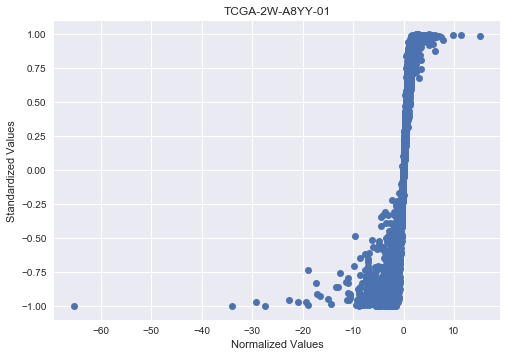

In [65]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [66]:
filename = path+'tcga_cesc_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [67]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [68]:
tertiary_matrix.head()

,TCGA-2W-A8YY-01,TCGA-4J-AA1J-01,TCGA-BI-A0VR-01,TCGA-BI-A0VS-01,TCGA-BI-A20A-01,TCGA-C5-A0TN-01,TCGA-C5-A1BE-01,TCGA-C5-A1BF-01,TCGA-C5-A1BI-01,TCGA-C5-A1BJ-01,...,TCGA-ZJ-AAXD-01,TCGA-ZJ-AAXF-01,TCGA-ZJ-AAXI-01,TCGA-ZJ-AAXJ-01,TCGA-ZJ-AAXN-01,TCGA-ZJ-AAXT-01,TCGA-ZJ-AAXU-01,TCGA-ZJ-AB0H-01,TCGA-ZJ-AB0I-01,TCGA-ZX-AA5X-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [69]:
filename = path+'tcga_cesc_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [70]:
name = 'tcga_cesc_gene_up_set'

In [71]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [72]:
name = 'tcga_cesc_gene_down_set'

In [73]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [74]:
name = 'tcga_cesc_attribute_up_set'

In [75]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [76]:
name = 'tcga_cesc_attribute_down_set'

In [77]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [78]:
attribute_normalized_matrix = normalized_matrix.copy()

In [79]:
getSampleData(attribute_normalized_matrix, sample_meta)

In [80]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [81]:
attribute_similarity_matix.head()

,"(Donor:TCGA-2W-A8YY, Age:51.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Adenosquamous, Tissue:Cervical, Tumor:nan, GradeG3)","(Donor:TCGA-4J-AA1J, Age:31.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG3)","(Donor:TCGA-BI-A0VR, Age:53.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG3)","(Donor:TCGA-BI-A0VS, Age:48.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG3)","(Donor:TCGA-BI-A20A, Age:49.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG3)","(Donor:TCGA-C5-A0TN, Age:21.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG3)","(Donor:TCGA-C5-A1BE, Age:64.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)","(Donor:TCGA-C5-A1BF, Age:46.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG1)","(Donor:TCGA-C5-A1BI, Age:31.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)","(Donor:TCGA-C5-A1BJ, Age:34.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)",...,"(Donor:TCGA-ZJ-AAXD, Age:35.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)","(Donor:TCGA-ZJ-AAXF, Age:62.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG3)","(Donor:TCGA-ZJ-AAXI, Age:67.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)","(Donor:TCGA-ZJ-AAXJ, Age:43.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, Gradenan)","(Donor:TCGA-ZJ-AAXN, Age:34.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, Gradenan)","(Donor:TCGA-ZJ-AAXT, Age:54.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)","(Donor:TCGA-ZJ-AAXU, Age:51.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)","(Donor:TCGA-ZJ-AB0H, Age:48.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, Gradenan)","(Donor:TCGA-ZJ-AB0I, Age:25.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, Gradenan)","(Donor:TCGA-ZX-AA5X, Age:64.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG2)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-2W-A8YY, Age:51.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Adenosquamous, Tissue:Cervical, Tumor:nan, GradeG3)",1.000000,0.088809,0.024753,0.068059,0.046137,0.004371,0.023952,0.055528,-0.020971,0.012342,...,0.026314,0.039904,-0.059737,-0.070054,0.061725,0.036888,-0.000079,0.000107,-0.047154,0.076726
"(Donor:TCGA-4J-AA1J, Age:31.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Cervical Squamous Cell Carcinoma, Tissue:Cervical, Tumor:nan, GradeG3)",0.088809,1.000000,0.133889,0.12706

# Save Attribute Similarity Matrix

In [82]:
filename = path+'tcga_cesc_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [83]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [84]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [85]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.075612,-0.131760,0.188551,0.082056,-0.019365,-0.015840,-0.010324,-0.048680,-0.020403,...,0.094567,0.022429,-0.063131,-0.002432,0.016991,0.107118,-0.080440,0.030988,-0.127167,0.059997
A1CF,-0.075612,1.000000,-0.019442,-0.267359,0.028518,-0.097278,-0.002450,0.156560,0.027682,-0.049851,...,-0.060229,0.035855,0.010119,0.039630,-0.116861,-0.203565,-0.046082,-0.056986,0.160956,0.029009
A2M,-0.131760,-0.019442,1.000000,-0.098038,-0.065377,-0.005808,-0.046140,-0.064009,-0.045540,-0.134418,...,-0.274052,-0.271787,0.004506,0.054186,-0.106745,-0.226951,0.096293,0.459193,0.063647,0.037975
A2ML1,0.188551,-0.267359,-0.098038,1.000000,0.112271,0.056345,-0.025809,-0.227470,0.273834,0.109231,...,0.233457,0.053416,0.014441,0.011129,0.283294,0.214974,0.031325,-0.032036,0.130950,0.172717
A3GALT2,0.082056,0.028518,-0.065377,0.112271,1.000000,0.024447,0.057581,0.070410,0.126045,-0.010212,...,0.160063,0.054512,0.039622,-0.008074,0.143120,0.264695,0.138144,-0.171192,0.125483,0.143037


# Save Gene Similarity Matrix

In [86]:
filename = path+'tcga_cesc_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [87]:
name = 'tcga_cesc_gene_attribute_edge_list'

In [88]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  309 Out of 309   

 The number of statisticaly relevent gene-attribute associations is: 284538
